In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd
from io import StringIO
pd.set_option('display.max_columns', 50)

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'

params = {
    'offense_description': 'BURGLARY- AGGRAVATED',
    'offense_description': 'Burglary - Aggravated - Acting in Concert',
    '$where': 'incident_reported between \'2021-01-01\' and \'2021-06-30\''
}

response = requests.get(endpoint, params = params)

In [3]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.geojson'

params = {
    'offense_description': 'BURGLARY- AGGRAVATED',
    'offense_description': 'Burglary - Aggravated - Acting in Concert',
    '$where': 'incident_reported between \'2021-01-01\' and \'2021-06-30\''
}

response = requests.get(endpoint, params = params)

In [4]:
incidents_df = gpd.read_file(StringIO(response.text))
display(incidents_df.head())

,victim_county_resident,zip_code,victim_number,offense_nibrs,rpa,latitude,victim_race,incident_number,investigation_status,offense_number,offense_description,longitude,domestic_related,victim_ethnicity,incident_location,victim_description,location_code,report_type,incident_reported,weapon_description,location_description,weapon_primary,report_type_description,victim_type,incident_status_code,incident_status_description,zone,victim_gender,incident_occurred,primary_key,geometry
0,RESIDENT,None,1,220,8501,36.08,B,20210216288,Open,1,Burglary - Aggravated - Acting in Concert,-86.73,False,Non-Hispanic,WELSHWOOD DR,INDIVIDUAL (18 AND OVER),22,D,2021-04-17T18:43:00,CLUB,"RESIDENCE, HOME",07,DISPATCHED,I,O,OPEN,823,M,2021-04-17T16:30:00,20210216288_11,POINT (-86.73000 36.08000)
1,RESIDENT,None,1,220,1023,36.17,B,20210007539,Open,3,Burglary - Aggravated - Acting in Concert,-86.76,False,Non-Hispanic,S 7TH ST,INDIVIDUAL (18 AND OVER),90,D,2021-01-05T10:52:00,HANDGUN,APARTMENT,01,DISPATCHED,I,O,OPEN,211,M,2020-12-25T21:00:00,20210007539_31,POINT (-86.76000 36.17000)
2,RESIDENT,None,3,220,8501,36.08,B,20210216288,Open,1,Burglary - Aggravated - Acting in Concert,-86.73,False,Non-Hispanic,WELSHWOOD DR,INDIVIDUAL (18 AND OVER),22,D,2021-04-17T18:43:00,CLUB,"RESIDENCE, HOME",07,DISPATCHED,I,O,OPEN,823,F,2021-04-17T16:30:00,20210216288_13,POINT (-86.73000 36.08000)
3,RESIDENT,37211,1,220,8419,36.082,B,20210247846,Closed,1,Burglary - Aggravated - Acting in Concert,-86.716,False,Non-Hispanic,509 509,INDIVIDUAL (18 AND OVER),90,D,2021-05-04T01:15:00,PERSONAL (HANDS),APARTMENT,09,DISPATCHED,I,A,CLEARED BY ARREST,321,F,2021-05-04T00:40:00,20210247846_11,POINT (-86.71600 36.08200)
4,RESIDENT,None,2,220,8815,36.13,W,20210273440,Open,2,Burglary - Aggravated - Acting in Concert,-86.72,False,Non-Hispanic,MURFREESBORO PIKE,INDIVIDUAL (18 AND OVER),90,D,2021-05-17T11:19:00,PERSONAL (HANDS),APARTMENT,09,DISPATCHED,I,O,OPEN,531,M,2021-05-17T10:14:00,20210273440_22,POINT (-86.72000 36.13000)


In [5]:
census_tracts = gpd.read_file('../data/tl_2019_47_tract/tl_2019_47_tract.shp')
census_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


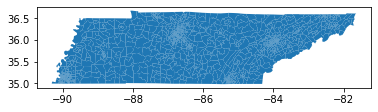

In [6]:
census_tracts.plot();

In [7]:
with open('../data/census.json') as fi:
    credentials = json.load(fi)
    
api_key = credentials['api_key']

In [8]:
endpoint = 'https://api.census.gov/data/2019/acs/acs5'

params = {
    'get': 'B01001_001E',
    'for': 'tract:*',
    'in': 'state:47 county:037',
    'key': api_key
}

response = requests.get(endpoint, params = params)

In [9]:
population = response.json()
population_df = pd.DataFrame(data = population[1:], columns = population[0])
population_df = population_df.rename(columns={'B01001_001E': 'population'})
display(population_df.head())

,population,state,county,tract
0,12176,47,037,015631
1,4098,47,037,015804
2,2466,47,037,017701
3,5210,47,037,017702
4,8254,47,037,018301


In [10]:
endpoint = 'https://api.census.gov/data/2019/acs/acs5/subject'

params = {
    'get': 'S1901_C01_012E',
    'for': 'tract:*',
    'in': 'state:47 county:037',
    'key': api_key
}

response = requests.get(endpoint, params = params)

In [11]:
median_income = response.json()
median_income_df = pd.DataFrame(data = median_income[1:], columns = median_income[0])
median_income_df = median_income_df.rename(columns={'S1901_C01_012E': 'median_income'})
display(median_income_df.head())

,median_income,state,county,tract
0,75579,47,037,015631
1,45129,47,037,015804
2,134786,47,037,017701
3,107813,47,037,017702
4,87591,47,037,018301


In [12]:
merged_df = pd.merge(population_df, median_income_df)